In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

%matplotlib inline
filterwarnings('ignore')

In [70]:
data = pd.read_csv('data.csv', sep=';')
data = data.rename(columns={'Eladás': 'Sale', 'Hőmérséklet': 'Temperature', 'Dátum': 'Date'})
data['Temperature'] = data['Temperature'].apply(lambda x: x.replace(',', '.')).apply(lambda x: float(x))
data.head(3)

,Date,Sale,Temperature
0,2012.05.15,26062,13.5
1,2012.05.16,24669,14.2
2,2012.05.17,27119,13.3


In [71]:
data.isnull().sum()

Date           0
Sale           0
Temperature    0
dtype: int64

In [72]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y.%m.%d')
data['Month_Name'] = data['Date'].apply(lambda x: x.strftime('%B'))
data.head(3)

,Date,Sale,Temperature,Month_Name
0,2012-05-15,26062,13.5,May
1,2012-05-16,24669,14.2,May
2,2012-05-17,27119,13.3,May


In [73]:
monthly_temp = data.groupby('Month_Name')['Temperature'].mean().reset_index()
data = pd.merge(data, monthly_temp, on='Month_Name', suffixes=('', '_avg'))
data['Temperature_Diff'] = data['Temperature'] - data['Temperature_avg']

data['Temperature_Diff'] = data['Temperature_Diff'].round(2)
data['Temperature_avg'] = data['Temperature_avg'].round(2)
data.head(3)

,Date,Sale,Temperature,Month_Name,Temperature_avg,Temperature_Diff
0,2012-05-15,26062,13.5,May,18.71,-5.21
1,2012-05-16,24669,14.2,May,18.71,-4.51
2,2012-05-17,27119,13.3,May,18.71,-5.41


In [74]:
monthly_sale = data.groupby('Month_Name')['Sale'].mean().reset_index()
merged_data = pd.merge(data, monthly_sale, on='Month_Name', suffixes=('', '_avg'))

merged_data['Sale_Diff'] = merged_data['Sale'] - merged_data['Sale_avg']
merged_data['Sale_avg'] = merged_data['Sale_avg'].round(2)
merged_data['Sale_Diff'] = merged_data['Sale_Diff'].round(2)
merged_data.head(3)

,Date,Sale,Temperature,Month_Name,Temperature_avg,Temperature_Diff,Sale_avg,Sale_Diff
0,2012-05-15,26062,13.5,May,18.71,-5.21,48456.93,-22394.93
1,2012-05-16,24669,14.2,May,18.71,-4.51,48456.93,-23787.93
2,2012-05-17,27119,13.3,May,18.71,-5.41,48456.93,-21337.93


In [75]:
data = merged_data

In [76]:
data.describe()

,Sale,Temperature,Temperature_avg,Temperature_Diff,Sale_avg,Sale_Diff
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,90122.178082,23.106849,23.106712,0.000137,90122.178493,-0.000411
std,41055.764469,4.792799,2.552173,4.055493,21524.549013,34960.973600
min,24669.000000,13.300000,18.710000,-7.250000,48456.930000,-49356.900000
25%,65329.000000,19.500000,22.950000,-3.450000,97832.900000,-29348.900000
50%,79721.000000,22.800000,22.950000,0.050000,97832.900000,-8347.930000
75%,114832.000000,26.800000,25.630000,3.090000,104181.360000,22676.070000
max,196574.000000,31.500000,25.630000,7.250000,104181.360000,98741.100000


In [77]:
data[['Temperature_Diff', 'Sale_Diff']].corr()

,Temperature_Diff,Sale_Diff
Temperature_Diff,1.000000,0.412284
Sale_Diff,0.412284,1.000000


In [78]:
data["Above_MonthlyAVG_Temp"] = data["Temperature_Diff"] > 0
data.head(1)

,Date,Sale,Temperature,Month_Name,Temperature_avg,Temperature_Diff,Sale_avg,Sale_Diff,Above_MonthlyAVG_Temp
0,2012-05-15,26062,13.5,May,18.71,-5.21,48456.93,-22394.93,False


In [79]:
sns.set_style("whitegrid", {'axes.grid': True, 'grid.color': 'black'})

Text(0.5, 1.08, 'Monthly Sales vs. Temperature Difference from Monthly Average')

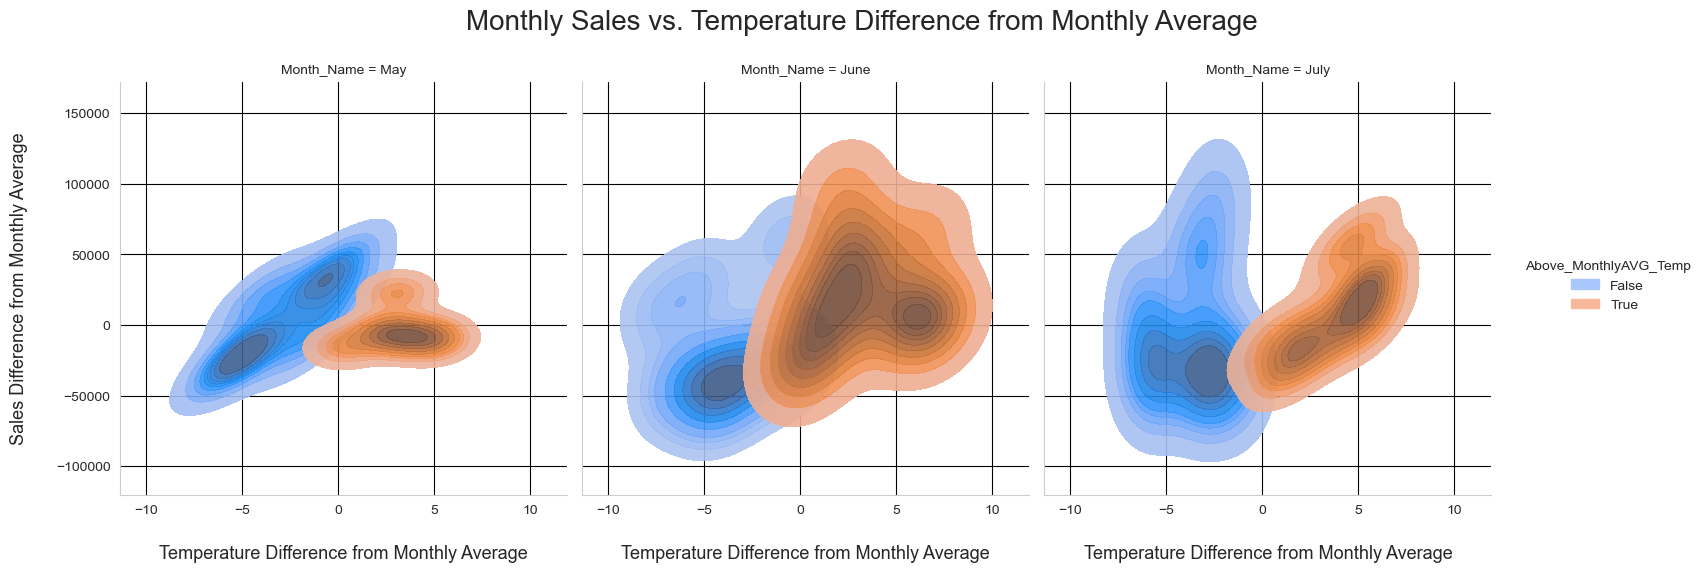

In [80]:
g = sns.displot(data=data, y='Sale_Diff',x='Temperature_Diff', hue='Above_MonthlyAVG_Temp',
                kind='kde',
                col='Month_Name',
                palette='coolwarm',
                alpha=0.9,
                common_norm=False,
                fill=True,
                height=5)

g.set_axis_labels('Temperature Difference from Monthly Average', 'Sales Difference from Monthly Average', fontsize=13, labelpad=20)
g.fig.suptitle('Monthly Sales vs. Temperature Difference from Monthly Average', fontsize=20, y=1.08)

Text(0.5, 1.08, 'Monthly Sales vs. Temperature Difference from Monthly Average')

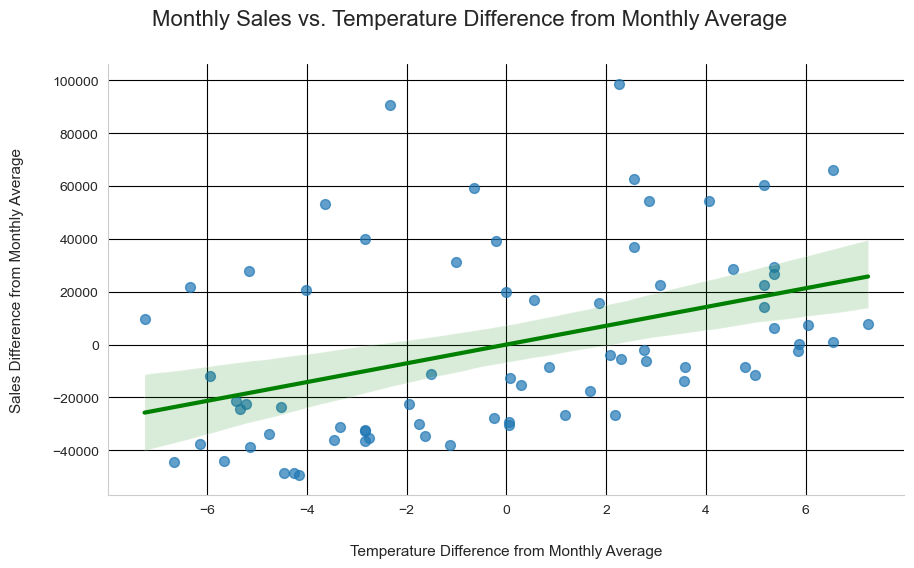

In [81]:
g = sns.lmplot(data=data, y="Sale_Diff", x="Temperature_Diff",
               height=5, aspect=1.8, scatter_kws={"s": 50, "alpha": 0.7}, line_kws={"color": "green", "linewidth": 3})

g.set_axis_labels('Temperature Difference from Monthly Average', 'Sales Difference from Monthly Average', fontsize=11, labelpad=20)
g.fig.suptitle('Monthly Sales vs. Temperature Difference from Monthly Average', fontsize=16, y=1.08)

Text(0.5, 1.08, 'Monthly Sales vs. Temperature Difference from Monthly Average')

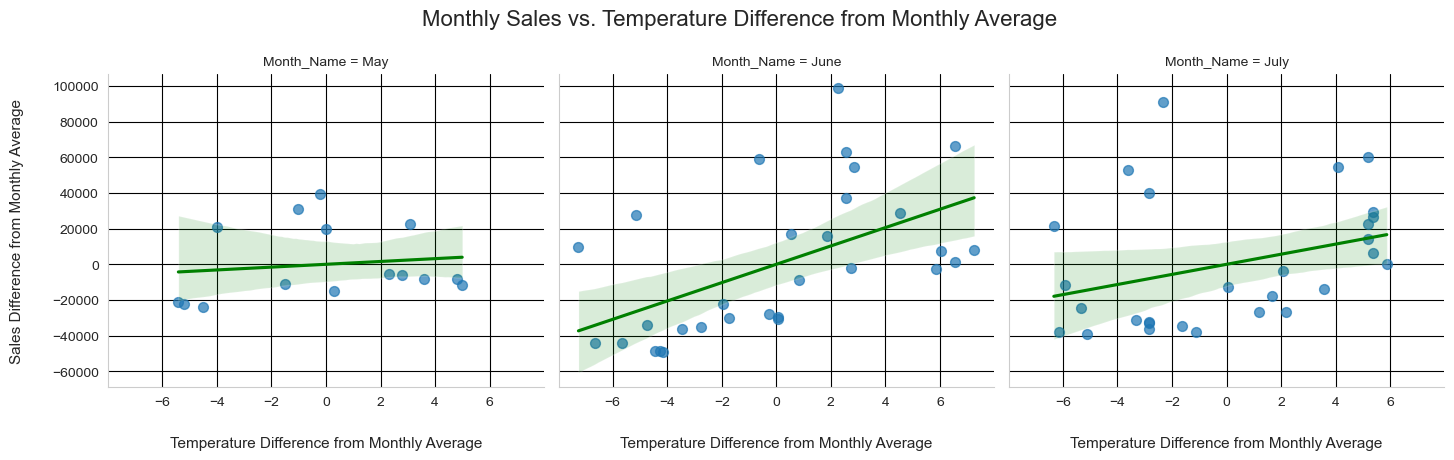

In [82]:
g = sns.lmplot(data=data, y="Sale_Diff", x="Temperature_Diff",
               height=4, aspect=1.2, scatter_kws={"s": 50, "alpha": 0.7}, line_kws={"color": "green"},
               col="Month_Name")
g.set_axis_labels('Temperature Difference from Monthly Average', 'Sales Difference from Monthly Average', fontsize=11, labelpad=20)
g.fig.suptitle('Monthly Sales vs. Temperature Difference from Monthly Average', fontsize=16, y=1.08)